In [1]:
import qcodes as qc
qc.halt_bg()
import numpy as np

# Saving parameters
Samplename = '6QAK3_A2_qcodes';
loc_provider = qc.data.location.FormatLocation(fmt='A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/%s/data/{counter}' % Samplename)
qc.data.data_set.DataSet.location_provider=loc_provider
station = qc.Station()

No loop running


In [1]:
import qcodes.instrument_drivers.rohde_schwarz.SGS100A as RSdriver
localos = RSdriver.RohdeSchwarz_SGS100A('LO', 'TCPIP0::172.20.3.42::inst0::INSTR')
cavity1 = RSdriver.RohdeSchwarz_SGS100A('C1', 'TCPIP0::172.20.3.28::inst0::INSTR')
qubit2  = RSdriver.RohdeSchwarz_SGS100A('Q2', 'TCPIP0::172.20.3.168::inst0::INSTR')
station.add_component(localos, cavity1, qubit2)
fq = qubit2.frequency,lcavity.power

import qcodes.instrument.parameter as parameter
import qcodes.instrument_drivers.AlazarTech.ATS9360 as ATSdriver
import qcodes.instrument_drivers.AlazarTech.ATS_acquisition_controllers as ats_contr
ats_inst = ATSdriver.AlazarTech_ATS9360(name='Alazar1', server_name="alazar_server")
station.add_component(ats_inst)

station.add_component(localos, cavity1, qubit2)

No loop running
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103076, firmware:3.1.19.7-3.20.140.60.1) in 0.03s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103079, firmware:3.1.19.7-3.20.140.60.1) in 0.01s
Connected to: Rohde&Schwarz SGS100A (serial:1416.0505k02/103077, firmware:3.1.19.7-3.20.140.60.1) in 0.01s


a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


'<RohdeSchwarz_SGS100A: C1>_2'

In [3]:
ats_inst.get_idn()

{'CPLD_version': '25.16',
 'SDK_version': '5.9.25',
 'asopc_type': '1712554848',
 'bits_per_sample': 12,
 'driver_version': '5.9.25',
 'firmware': None,
 'latest_cal_date': '13-11-15',
 'max_samples': 4294967294,
 'memory_size': '4294967294',
 'model': 'ATS9360',
 'pcie_link_speed': '0.5GB/s',
 'pcie_link_width': '8',
 'serial': '970344',
 'vendor': 'AlazarTech'}

In [4]:
# Configure all settings in the Alazar card
ats_inst.config(clock_source='EXTERNAL_CLOCK_10MHz_REF',
                sample_rate='10MHZ_REF_500MSPS',
                clock_edge='CLOCK_EDGE_RISING',
                decimation=1,
                coupling=['DC','DC'],
                channel_range=[.4,.4],
                impedance=[50,50],
                trigger_operation='TRIG_ENGINE_OP_J',
                trigger_engine1='TRIG_ENGINE_J',
                trigger_source1='EXTERNAL',
                trigger_slope1='TRIG_SLOPE_POSITIVE',
                trigger_level1=140,
                trigger_engine2='TRIG_ENGINE_K',
                trigger_source2='DISABLE',
                trigger_slope2='TRIG_SLOPE_POSITIVE',
                trigger_level2=128,
                external_trigger_coupling='DC',
                external_trigger_range='ETR_2V5',
                trigger_delay=0,
                timeout_ticks=0,
                aux_io_mode='AUX_IN_AUXILIARY',
                aux_io_param='NONE'
                #aux_io_mode='AUX_IN_TRIGGER_ENABLE', 
                #aux_io_param='TRIG_SLOPE_POSITIVE'
)

In [11]:
import qcodes.instrument_drivers.AlazarTech.Samp_controller as sample_controller

samp_cont = sample_controller.HD_Samples_Controller(name='samples_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 5e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [45]:
samp_cont3 = sample_controller.HD_Samples_Controller(name='samples_controller3', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 20e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [52]:
samp_cont3.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=2560,
                 records_per_buffer=1000,
                 buffers_per_acquisition=10,
                 int_delay=2e-7,
                 int_time =3e-6,
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [60]:
demod_freq = 20e6

cavity1.power(-50)
cavity1.frequency(7.147e9)

localos.power(15)
set_localos(demod_freq)

qubit2.power(-60)
qubit2.frequency(7.5e9)

localos.status('on')
cavity1.status('on')
qubit2.status('off')

In [49]:
loop = qc.Loop(cavity1.frequency.sweep(7.13e9,7.15e9, 0.25e6)).each(samp_cont3.acquisition,
            qc.Task(localos.frequency.set, (cavity1.frequency+ demod_freq)))
data = loop.get_data_set()
plot = qc.QtPlot()
plot.add(data.samples_controller3_magnitude)
plot.add(data.samples_controller3_phase, subplot=2)
_ = loop.with_bg_task(plot.update, plot.save).run()

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/6QAK3_A2_qcodes/data/027'
   <Type>   | <array_id>                    | <array.name> | <array.shape>
   Setpoint | C1_frequency_set              | frequency    | (81,)
   Measured | sample_num                    | sample_num   | (81, 2560)
   Measured | samples_controller3_magnitude | magnitude    | (81, 2560)
   Measured | samples_controller3_phase     | phase        | (81, 2560)
started at 2016-11-18 20:11:44


In [17]:
2048 + 512

2560

In [30]:
localos.frequency()

7151300000.0

In [26]:
cavity1.frequency()

7146300000.0

In [53]:
import qcodes.instrument_drivers.AlazarTech.Single_controller as single_controller

sing_contr = single_controller.HD_Controller(name='single_controller', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 20e6,
                                                      server_name="alazar_server")

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [55]:
sing_contr.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=2560,
                 records_per_buffer=1000,
                 buffers_per_acquisition=10,
                 int_delay=2e-7,
                 int_time =3e-6,
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [68]:
loop = qc.Loop(cavity1.frequency.sweep(7.13e9,7.15e9, 0.25e6)).each(sing_contr.acquisition,
            qc.Task(localos.frequency.set, (cavity1.frequency+ demod_freq)))
data = loop.get_data_set()
plot = qc.QtPlot()
plot.add(data.single_controller_magnitude)
plot.add(data.single_controller_phase, subplot=2)
_ = loop.with_bg_task(plot.update, plot.save).run()

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/6QAK3_A2_qcodes/data/031'
   <Type>   | <array_id>                  | <array.name> | <array.shape>
   Setpoint | C1_frequency_set            | frequency    | (81,)
   Measured | single_controller_magnitude | magnitude    | (81,)
   Measured | single_controller_phase     | phase        | (81,)
started at 2016-11-18 20:30:59


a:\qcodes\qcodes\plots\pyqtgraph.py:325: UserWarning: nonlinear setpoint array passed to pyqtgraph. ignoring, using default scaling.
  warnings.warn('nonlinear setpoint array passed to pyqtgraph. '


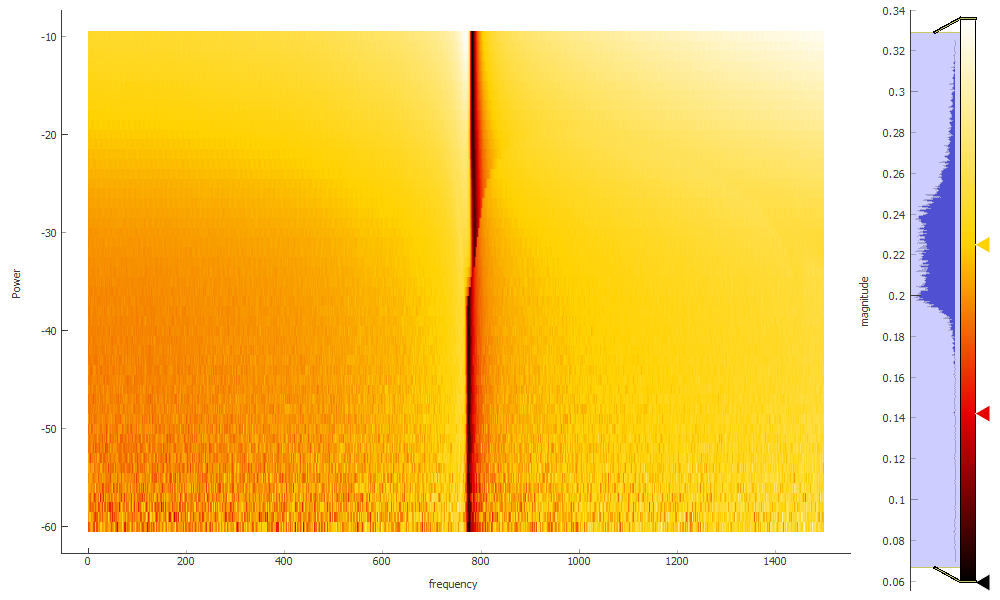

In [2]:
loaded_data = qc.load_data(loc_provider.formatter.format(loc_provider.fmt,counter='014'))
plot = qc.QtPlot()
plot.add(loaded_data.VNA_magnitude)
plot.add(loaded_data.VNA_phase, subplot=2)
#plot.save()

In [69]:
demod_freq = 20e6

cavity1.power(-55)
cavity1.frequency(7.133e9)

localos.power(15)
set_localos(demod_freq)

qubit2.power(-30)
qubit2.frequency(7.5e9)

localos.status('on')
cavity1.status('on')
qubit2.status('on')

In [75]:
loop = qc.Loop(qubit2.frequency.sweep(8e9,8.5e9, 2e6)).each(sing_contr.acquisition)
data = loop.get_data_set()
plot = qc.QtPlot()
plot.add(data.single_controller_magnitude)
plot.add(data.single_controller_phase, subplot=2)
_ = loop.with_bg_task(plot.update, plot.save).run()

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/6QAK3_A2_qcodes/data/034'
   <Type>   | <array_id>                  | <array.name> | <array.shape>
   Setpoint | Q2_frequency_set            | frequency    | (251,)
   Measured | single_controller_magnitude | magnitude    | (251,)
   Measured | single_controller_phase     | phase        | (251,)
started at 2016-11-18 20:50:01


In [76]:
sing_contr2 = single_controller.HD_Controller(name='single_controller2', 
                                                      alazar_name='Alazar1', 
                                                      demod_freq = 20e6,
                                                      server_name="alazar_server",
                                                     filt='dot')

a:\qcodes\qcodes\instrument\metaclass.py:37: UserWarning: Multiprocessing is in beta, use at own risk
  UserWarning)


In [79]:
sing_contr2.update_acquisitionkwargs(#mode='NPT',
                 samples_per_record=2560,
                 records_per_buffer=1000,
                 buffers_per_acquisition=1,
                 int_delay=2e-7,
                 int_time =3e-6,
                 allocated_buffers=1,
                 #buffer_timeout=1000
)

In [80]:
loop = qc.Loop(qubit2.frequency.sweep(8e9,8.5e9, 2e6)).each(sing_contr2.acquisition)
data = loop.get_data_set()
plot = qc.QtPlot()
plot.add(data.single_controller2_magnitude)
plot.add(data.single_controller2_phase, subplot=2)
_ = loop.with_bg_task(plot.update, plot.save).run()

DataSet:
   mode     = DataMode.LOCAL
   location = 'A:/TransmonExperiments/GoogleDrive/T2acquisition/Data/6QAK3_A2_qcodes/data/036'
   <Type>   | <array_id>                   | <array.name> | <array.shape>
   Setpoint | Q2_frequency_set             | frequency    | (251,)
   Measured | single_controller2_magnitude | magnitude    | (251,)
   Measured | single_controller2_phase     | phase        | (251,)
started at 2016-11-18 20:56:48


In [81]:
localos.status('off')
cavity1.status('off')
qubit2.status('off')